# Assignment 2 - Hands on Training Data Influence
## Sandeep Kaur (301459836) ,  Jashandeep Kaur (301448909) ,   Kamal Kaur(301448878)

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score,roc_curve, auc, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn 
from copy import deepcopy
import random
from timeit import default_timer as timer

## Part 1:
### Dataset Description: 
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico,
Peru and Colombia, based on their eating habits and physical condition.

In [2]:
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 

### Features and Labels:
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [3]:
# data (as pandas dataframes) 
#features
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 

#labels
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 

#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)
# variable information 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


In [4]:
#conversion of y label and X features that are string into numeric array

#features

# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

#convert string features to numeric form
string_features =['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

for feature in string_features:
    # Apply LabelEncoder to each string column
    X.loc[:,feature] = label_encoder.fit_transform(X[feature])

print("Features")
print(X.head())

#labels
y = y['NObeyesdad']

print(y)

Features
  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0      0  21.0    1.62    64.0                              1    0   2.0  3.0   
1      0  21.0    1.52    56.0                              1    0   3.0  3.0   
2      1  23.0    1.80    77.0                              1    0   2.0  3.0   
3      1  27.0    1.80    87.0                              0    0   3.0  3.0   
4      1  22.0    1.78    89.8                              0    0   2.0  1.0   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC MTRANS  
0    2     0   2.0   0  0.0  1.0    3      3  
1    2     1   3.0   1  3.0  0.0    2      3  
2    2     0   2.0   0  2.0  1.0    1      3  
3    2     0   2.0   0  2.0  0.0    1      4  
4    2     0   2.0   0  0.0  0.0    2      3  
0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_II

### Classification:
Lets Think of it as a classification Task and try to train the model and predict NObesity (Obesity Level), that allows 
which are Insufficient Weight,Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III
without converting them to numeric labels

### Splitting into train and test sets :
In a random 80/20 split:

Approximately 80% of the data is used for training, and 20% is reserved for testing.
The split is performed randomly, ensuring that each subset is representative of the overall dataset

In [5]:
# Feature Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# y_numpy = y.to_numpy()

#X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y_numpy, test_size=0.2, random_state=42)

#unique_classes = np.unique(y_train)

# Convert to binary format for each class
#y_train_bin = label_binarize(y_train, classes=unique_classes)
#y_valid_bin = label_binarize(y_valid, classes=unique_classes)

### Training Classifier

In [6]:
def defineModels():
    
    model_logistic_regression = make_pipeline(
                       StandardScaler(),LogisticRegression(max_iter=1000))
    model_knn_neighbours = make_pipeline(
                       StandardScaler(),
                       KNeighborsClassifier(n_neighbors=5))

    model_random_forest = make_pipeline(
        StandardScaler(),
        RandomForestClassifier(n_estimators=150,max_depth=12,min_samples_leaf=4))


    return model_logistic_regression, model_knn_neighbours, model_random_forest

In [7]:
model_logistic_regression,model_knn_neighbours, model_random_forest = defineModels()

In [8]:
#number of iterations
retraining_iter = 50

### Model Logistic Regression

In [9]:
# List to store accuracy scores
accuracy_scores_log_reg = []
# List to store incorrect predictions scores
total_incorrect_predictions_log_reg  = []

#start time
start = timer()

for i in range(retraining_iter):
    #Logistic Regression

    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=None)
    unique_classes = np.unique(y_train)

    # Convert to binary format for each class
    y_train_bin = label_binarize(y_train, classes=unique_classes)
    y_valid_bin = label_binarize(y_valid, classes=unique_classes)
    
    model_logistic_regression.fit(X_train, y_train)

    # Predictions
    y_pred_logistic_regression = model_logistic_regression.predict(X_valid)

    # Accuracy
    accuracy_log_reg = accuracy_score(y_valid, y_pred_logistic_regression)
    accuracy_scores_log_reg.append(accuracy_log_reg)
    #print(f"Iteration {i + 1} - Accuracy: {accuracy}")

    #check incorrect predictions
    df_logistic_regression = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_logistic_regression})
    incorrect_predictions_log_reg = len(df_logistic_regression[df_logistic_regression['truth'] != df_logistic_regression['prediction']])
    total_incorrect_predictions_log_reg.append(incorrect_predictions_log_reg)
    #print("Number of Incorrect predictions:" , incorrect_predictions)

#end time
end = timer()

print(f"Time take to retrain a model 50 times (in seconds):{(end-start)}")

#Printing model accuracy
print("\nAverage Results for Logistic Regression after running 50 iterations")
# Calculate and print the average accuracy
average_accuracy_log_reg = np.mean(accuracy_scores_log_reg)
print(f"Average Accuracy after {retraining_iter} iterations: {average_accuracy_log_reg}")

# Calculate and print the average incorrect predictions
average_incorrect_predictions_log_reg = np.mean(total_incorrect_predictions_log_reg)
print(f"Average incorrect predictions after {retraining_iter} iterations: {average_incorrect_predictions_log_reg}")

#Results of last iteration
print("\nResults for Last iteration of Logistic Regression:")

print(f"Accuracy: {accuracy_log_reg}")

print(f"Number of Incorrect predictions: {incorrect_predictions_log_reg}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred_logistic_regression)
print(f"Confusion Matrix:\n{conf_matrix}")

#classification_report
print("Classification Report:")
print(classification_report(y_valid,y_pred_logistic_regression))

Time take to retrain a model 50 times (in seconds):1.538188749924302

Average Results for Logistic Regression after running 50 iterations
Average Accuracy after 50 iterations: 0.8769267139479906
Average incorrect predictions after 50 iterations: 52.06

Results for Last iteration of Logistic Regression:
Accuracy: 0.8794326241134752
Number of Incorrect predictions: 51
Confusion Matrix:
[[58  1  0  0  0  0  0]
 [ 5 40  0  0  0 12  1]
 [ 0  0 64  2  0  0  1]
 [ 0  0  2 55  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  7  0  0  0 49 11]
 [ 0  1  4  0  0  4 36]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        59
      Normal_Weight       0.82      0.69      0.75        58
     Obesity_Type_I       0.91      0.96      0.93        67
    Obesity_Type_II       0.96      0.96      0.96        57
   Obesity_Type_III       1.00      1.00      1.00        70
 Overweight_Level_I       0.75      0.73      0.74    

#### Performance of Model Logistic Regression 

In [10]:
seaborn.set()

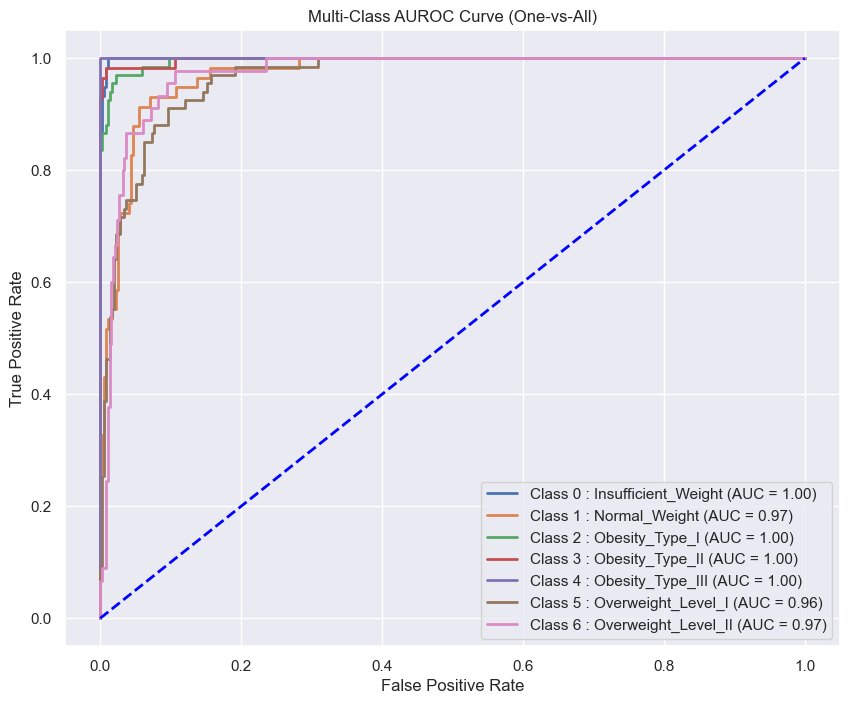

In [11]:
# Plot Multi-Class AUROC curve
plt.figure(figsize=(10, 8))
for i in range(unique_classes.size):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], model_logistic_regression.predict_proba(X_valid)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} : {unique_classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUROC Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()

### Model K nearest Neighbours

In [12]:
# List to store accuracy scores
accuracy_scores_k_neigh = []
# List to store incorrect predictions scores
total_incorrect_predictions_k_neigh  = []

# K nearest Neighbours
#start time
start = timer()

for i in range(retraining_iter):
    #K nearest Neighbours

    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=None)
    unique_classes = np.unique(y_train)

    # Convert to binary format for each class
    y_train_bin = label_binarize(y_train, classes=unique_classes)
    y_valid_bin = label_binarize(y_valid, classes=unique_classes)
    model_knn_neighbours.fit(X_train, y_train)

    # Predictions
    y_pred_knn_neighbours = model_knn_neighbours.predict(X_valid)

    # Accuracy
    accuracy_k_neigh = accuracy_score(y_valid, y_pred_knn_neighbours)
    accuracy_scores_k_neigh.append(accuracy_k_neigh)
   
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_valid, y_pred_knn_neighbours)

    #check incorrect predictions
    df_knn_neighbours = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_knn_neighbours})
    incorrect_predictions_k_neigh = len(df_knn_neighbours[df_knn_neighbours['truth'] != df_knn_neighbours['prediction']])
    total_incorrect_predictions_k_neigh.append(incorrect_predictions_k_neigh)

#end time
end = timer()

print(f"Time take to retrain a model 50 times (in seconds):{(end-start)}")

#Printing model accuracy
print("\nAverage Results for K nearest Neighbours after running 50 iterations")
# Calculate and print the average accuracy
average_accuracy_k_neigh = np.mean(accuracy_scores_k_neigh)
print(f"Average Accuracy after {retraining_iter} iterations: {average_accuracy_k_neigh}")

# Calculate and print the average incorrect predictions
average_incorrect_predictions_k_neigh = np.mean(total_incorrect_predictions_k_neigh)
print(f"Average incorrect predictions after {retraining_iter} iterations: {average_incorrect_predictions_k_neigh}")

#Results of last iteration
print("\nResults for Last iteration of K nearest Neighbours:")

print(f"Accuracy: {accuracy_k_neigh}")

print(f"Number of Incorrect predictions: {incorrect_predictions_k_neigh}")

# Confusion Matrix
print(f"Confusion Matrix:\n{conf_matrix}")

#classification_report
print("Classification Report:")
print(classification_report(y_valid,y_pred_knn_neighbours))


Time take to retrain a model 50 times (in seconds):0.9821999999694526

Average Results for K nearest Neighbours after running 50 iterations
Average Accuracy after 50 iterations: 0.8075177304964538
Average incorrect predictions after 50 iterations: 81.42

Results for Last iteration of K nearest Neighbours:
Accuracy: 0.8014184397163121
Number of Incorrect predictions: 84
Confusion Matrix:
[[54  3  0  0  0  3  0]
 [14 24  6  0  0  8  8]
 [ 1  2 60  3  0  0  3]
 [ 0  1  0 62  0  0  1]
 [ 0  0  0  0 66  0  0]
 [ 3  6  2  0  0 36  2]
 [ 1  4  4  6  0  3 37]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.90      0.81        60
      Normal_Weight       0.60      0.40      0.48        60
     Obesity_Type_I       0.83      0.87      0.85        69
    Obesity_Type_II       0.87      0.97      0.92        64
   Obesity_Type_III       1.00      1.00      1.00        66
 Overweight_Level_I       0.72      0.73      0.73 

#### Performance of Model K-Nearest Neighbours

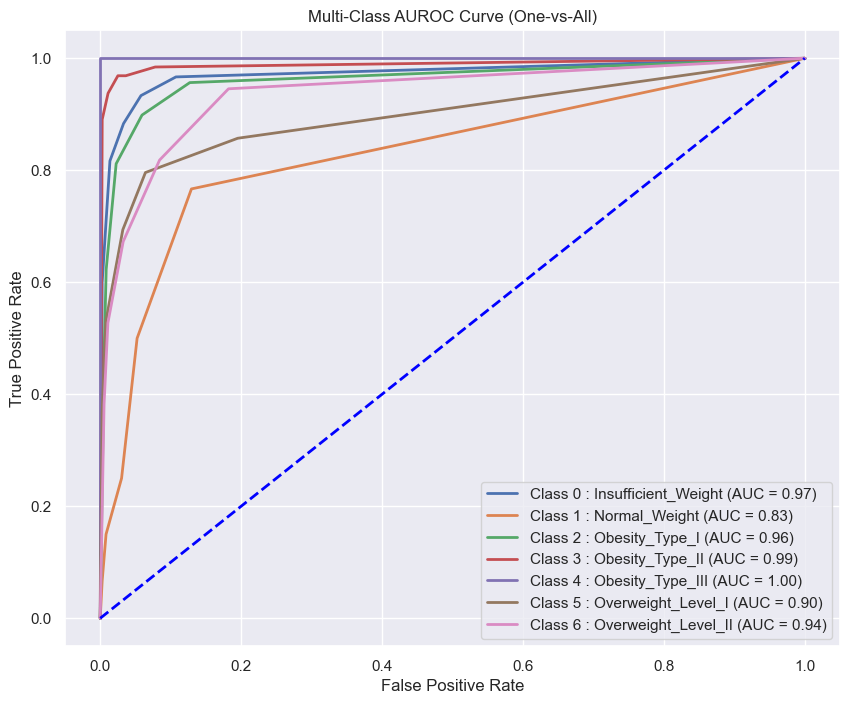

In [13]:
# Plot Multi-Class AUROC curve
plt.figure(figsize=(10, 8))
for i in range(unique_classes.size):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], model_knn_neighbours.predict_proba(X_valid)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} : {unique_classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUROC Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()

# Model Random Forest

In [14]:
#random forest results
# List to store accuracy scores
accuracy_scores_rand_forest = []
# List to store incorrect predictions scores
total_incorrect_predictions_rand_forest  = []

#start time
start = timer()

for i in range(retraining_iter):
    #random forest results

    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=None)
    unique_classes = np.unique(y_train)

    # Convert to binary format for each class
    y_train_bin = label_binarize(y_train, classes=unique_classes)
    y_valid_bin = label_binarize(y_valid, classes=unique_classes)
    model_random_forest.fit(X_train, y_train)

    # Predictions
    y_pred_random_forest = model_random_forest.predict(X_valid)

    # Accuracy
    accuracy_rand_forest = accuracy_score(y_valid, y_pred_random_forest)
    accuracy_scores_rand_forest.append(accuracy_rand_forest)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_valid, y_pred_random_forest)

    #Truth vs Prediction
    df_random_forest = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_random_forest})
    incorrect_predictions_rand_forest = len(df_random_forest[df_random_forest['truth'] != df_random_forest['prediction']])
    total_incorrect_predictions_rand_forest.append(incorrect_predictions_rand_forest)

#end time
end = timer()

print(f"Time take to retrain a model 50 times (in seconds):{(end-start)}")

#Printing model accuracy
print("\nAverage Results for Random Forest Classifier after running 50 iterations")
# Calculate and print the average accuracy
average_accuracy_rand_forest = np.mean(accuracy_scores_rand_forest)
print(f"Average Accuracy after {retraining_iter} iterations: {average_accuracy_rand_forest}")

# Calculate and print the average incorrect predictions
average_incorrect_predictions_rand_forest = np.mean(total_incorrect_predictions_rand_forest)
print(f"Average incorrect predictions after {retraining_iter} iterations: {average_incorrect_predictions_rand_forest}")

#Results of last iteration
print("\nResults for Last iteration of Random Forest Classifier:")

print(f"Accuracy: {accuracy_rand_forest}")

print(f"Number of Incorrect predictions: {incorrect_predictions_rand_forest}")

# Confusion Matrix
print(f"Confusion Matrix:\n{conf_matrix}")

#classification_report
print("Classification Report:")
print(classification_report(y_valid,y_pred_random_forest))
   

Time take to retrain a model 50 times (in seconds):11.23142920807004

Average Results for Random Forest Classifier after running 50 iterations
Average Accuracy after 50 iterations: 0.9436406619385344
Average incorrect predictions after 50 iterations: 23.84

Results for Last iteration of Random Forest Classifier:
Accuracy: 0.9290780141843972
Number of Incorrect predictions: 30
Confusion Matrix:
[[52  3  0  0  0  0  0]
 [ 0 51  0  0  0  2  1]
 [ 0  1 66  1  0  1  2]
 [ 0  0  2 68  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 48  5]
 [ 0  4  0  0  0  1 45]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.95      0.97        55
      Normal_Weight       0.77      0.94      0.85        54
     Obesity_Type_I       0.97      0.93      0.95        71
    Obesity_Type_II       0.99      0.97      0.98        70
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.92      0.80    

#### Performance of Model Random Forest

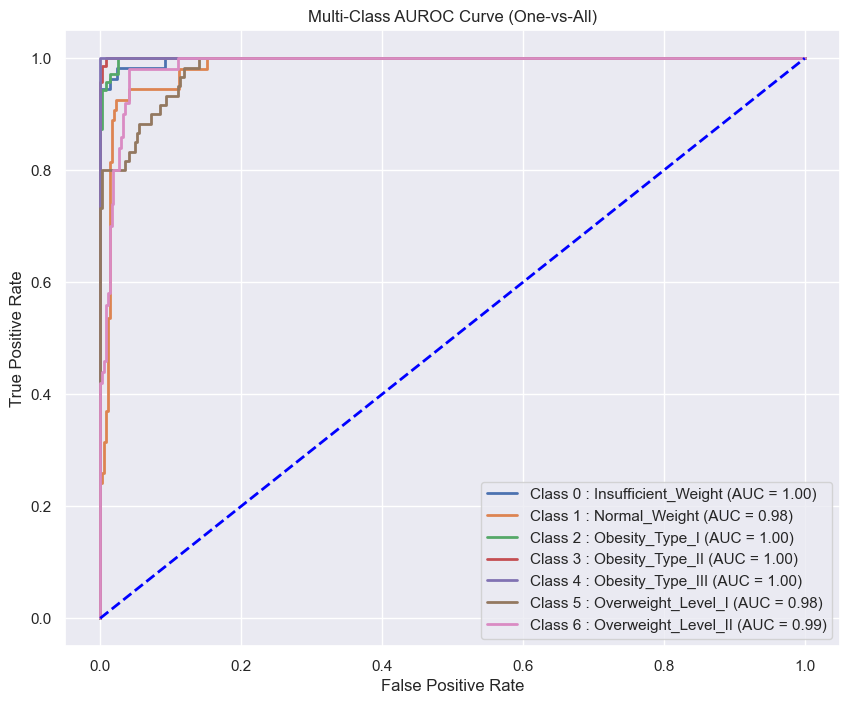

In [17]:
# Plot Multi-Class AUROC curve
plt.figure(figsize=(10, 8))
for i in range(unique_classes.size):
    fpr, tpr, _ = roc_curve(y_valid_bin[:, i], model_random_forest.predict_proba(X_valid)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} : {unique_classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class AUROC Curve (One-vs-All)')
plt.legend(loc='lower right')
plt.show()

# Part 2: Brute force LOO influence



# Selecting the indices randomly

In [16]:
indices_number = 10

indices_selected = random.sample(range(len(X_train)), indices_number)

print("Randomly selected indices:", indices_selected)



Randomly selected indices: [1060, 287, 1160, 1509, 760, 260, 112, 722, 1414, 494]


# Calculating the influence for each one of the selected data points
#### We selected "Random Forest Model" as an optimal model for this problem and took "precision" as our primary metric.

In [24]:
influence_scores = []

for index in indices_selected:

    # Make the copy of the data points on selected indices
    X_train_copy = deepcopy(X_train)
    y_train_copy = deepcopy(y_train)

    # Removed the data point on selected index
    X_train_selected_index_removed = np.delete(X_train_copy, index, axis=0)
    y_train_selected_index_removed = np.delete(y_train_copy, index, axis=0)

    #Retrain using Random forest model
    random_forest_model_with_removed_index = RandomForestClassifier(n_estimators=150,max_depth=12,min_samples_leaf=4)
    random_forest_model_with_removed_index.fit(X_train_selected_index_removed, y_train_selected_index_removed)

    # predict the validation set for random_forest_model_with_removed_index
    y_pred_valid = random_forest_model_with_removed_index.predict(X_valid)

    #compute the precision score with data point removed
    precision_score_with_removed_index = precision_score(y_valid, y_pred_valid, average='weighted')

    #predict validation set with original model
    y_pred_valid_original_model = model_random_forest.predict(X_valid)    

    #compute precision score with the selected data point
    precision_score_original = precision_score(y_valid, y_pred_valid_original_model, average='weighted')

    # compute influence score
    influence_score = precision_score_original - precision_score_with_removed_index
    influence_scores.append(influence_score)

# Create a DataFrame to store the influence scores
influence_df = pd.DataFrame({
    'Data Point': indices_selected,
    'Influence Score': influence_scores
})

# Print the DataFrame
print(influence_df)

average_influence = np.mean(influence_scores)
print(f"\nAverage Influence Score: {average_influence}")

if average_influence > 0:
    print("On average, leaving out these points tends to increase precision.")
else:
    print("On average, leaving out these points tends to decrease precision.")

   Data Point  Influence Score
0         473        -0.000737
1        1395         0.001609
2         126        -0.007857
3         517        -0.000995
4         211         0.003645
5         638         0.001215
6         906        -0.003906
7         304         0.003602
8        1551        -0.013684
9         414         0.008414

Average Influence Score: -0.0008693158033688086
On average, leaving out these points tends to decrease precision.


# Part 3 : Group-level influence

Calculate the group level influence

In [26]:
group_sizes_selection = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

group_influence_scores = []

# Loop over the different selected group sizes
for size in group_sizes_selection:

    # number of data points to be excluded based on group size
    number_of_data_points = int(len(X_train)* size)
   
    # randomly choose the data points to exclude
    group_index = np.random.choice(len(X_train), number_of_data_points, replace=False)

    # Make the copy of the data points on selected indices
    X_train_copy_part3 = deepcopy(X_train)
    y_train_copy_part3 = deepcopy(y_train)

    # Remove the data points selected
    X_train_group_removed = np.delete(X_train_copy_part3, group_index, axis=0)
    y_train_group_removed = np.delete(y_train_copy_part3, group_index, axis=0)

    # Retrain using Random forest model
    random_forest_model_with_removed_group = RandomForestClassifier(n_estimators=150,max_depth=12,min_samples_leaf=4)
    random_forest_model_with_removed_group.fit(X_train_group_removed, y_train_group_removed)
    
    # predict for x_valid based on retrained model
    y_pred_valid_group_removed = random_forest_model_with_removed_group.predict(X_valid)

    # calculate precision score on validation set with y_pred_valid_group_removed
    precision_score_group_removed = precision_score(y_valid, y_pred_valid_group_removed, average='weighted')

    # predict for x_valid based on original model
    y_pred_valid_original = model_random_forest.predict(X_valid)

    # calculate precision score on validation set with y_pred_valid_original
    precision_score_group_original = precision_score(y_valid, y_pred_valid_original, average='weighted')

    #calculate influence score
    calculated_group_influence_score = precision_score_group_removed - precision_score_original

    #Append the group influence score to the array
    group_influence_scores.append(calculated_group_influence_score)


for i, size in enumerate(group_sizes_selection):
    print(f"Group Size Chosen: {size}, Influence Score: {group_influence_scores[i]}")


Group Size Chosen: 0.1, Influence Score: -0.005032721759470671
Group Size Chosen: 0.2, Influence Score: -0.0123620606410767
Group Size Chosen: 0.3, Influence Score: -0.0009187212633254838
Group Size Chosen: 0.4, Influence Score: -0.023170604057187627
Group Size Chosen: 0.5, Influence Score: -0.009029512126935368
Group Size Chosen: 0.6, Influence Score: -0.0481809373625649
Group Size Chosen: 0.7, Influence Score: -0.06338438359379961
Group Size Chosen: 0.8, Influence Score: -0.10389770646738039
Group Size Chosen: 0.9, Influence Score: -0.20671595736193848


Plot that shows group size compared with the influence

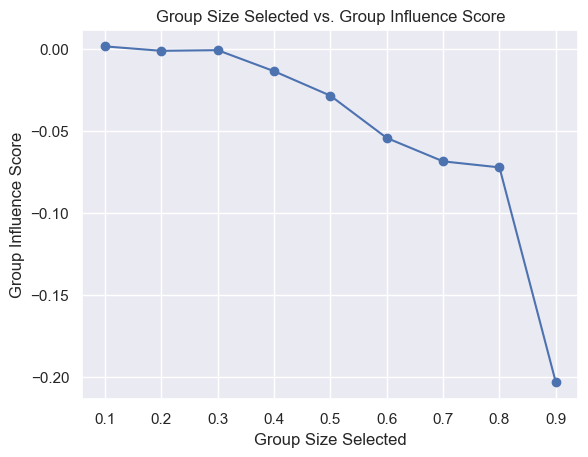

In [19]:
# Plot group size compared with the influence
plt.plot(group_sizes_selection, group_influence_scores, marker='o', linestyle='-')
plt.xlabel('Group Size Selected')
plt.ylabel('Group Influence Score')
plt.title('Group Size Selected vs. Group Influence Score')
plt.grid(True)
plt.show()